Reading data from CSV, data analysis, cleaning and transofrming to numeric form

In [80]:
#import of libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [81]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [82]:
data = pd.read_csv("LionsDen.csv", sep=";", decimal = ",")

Data analysis

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79155 entries, 0 to 79154
Data columns (total 50 columns):
CUSTOMER_ID                      79155 non-null int64
APPLICATION_ID                   79155 non-null float64
DEFAULT_FLAG                     79155 non-null int64
APPLICATION_DATE                 79155 non-null object
APPLICATION_HOUR                 79155 non-null object
APPLICATION_WEEKDAY              79155 non-null int64
APPLICATION_MONTH                79155 non-null int64
APPLICATION_YEAR                 79155 non-null int64
PRODUCT_GROUP                    79155 non-null object
LOAN_PERIOD                      79155 non-null int64
CREDIT_AMOUNT                    79155 non-null int64
CUSTOMER_TYPE                    79155 non-null object
COOP_PERIOD                      79155 non-null int64
CREDIT_COOP_PERIOD               79155 non-null int64
AGE                              79155 non-null int64
AGE_BANDS                        79155 non-null object
EDUCATION           

In [84]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
CUSTOMER_ID                          0
APPLICATION_ID                       0
DEFAULT_FLAG                         0
APPLICATION_DATE                     0
APPLICATION_HOUR                     0
APPLICATION_WEEKDAY                  0
APPLICATION_MONTH                    0
APPLICATION_YEAR                     0
PRODUCT_GROUP                        0
LOAN_PERIOD                          0
CREDIT_AMOUNT                        0
CUSTOMER_TYPE                        0
COOP_PERIOD                          0
CREDIT_COOP_PERIOD                   0
AGE                                  0
AGE_BANDS                            0
EDUCATION                            0
MARITAL_STATUS                       0
SPOUSE_PROPERTY_STATUS               0
OWNERSHIP                            0
NUMBER_OF_FAMILY_MEMBERS             0
MAIL_ADDR_SAME_AS_RESIDENTIAL        0
EMAIL_DOMAIN                         0
EMAIL_NAME_SURNAME                   0
MARKETING_CONSENT         

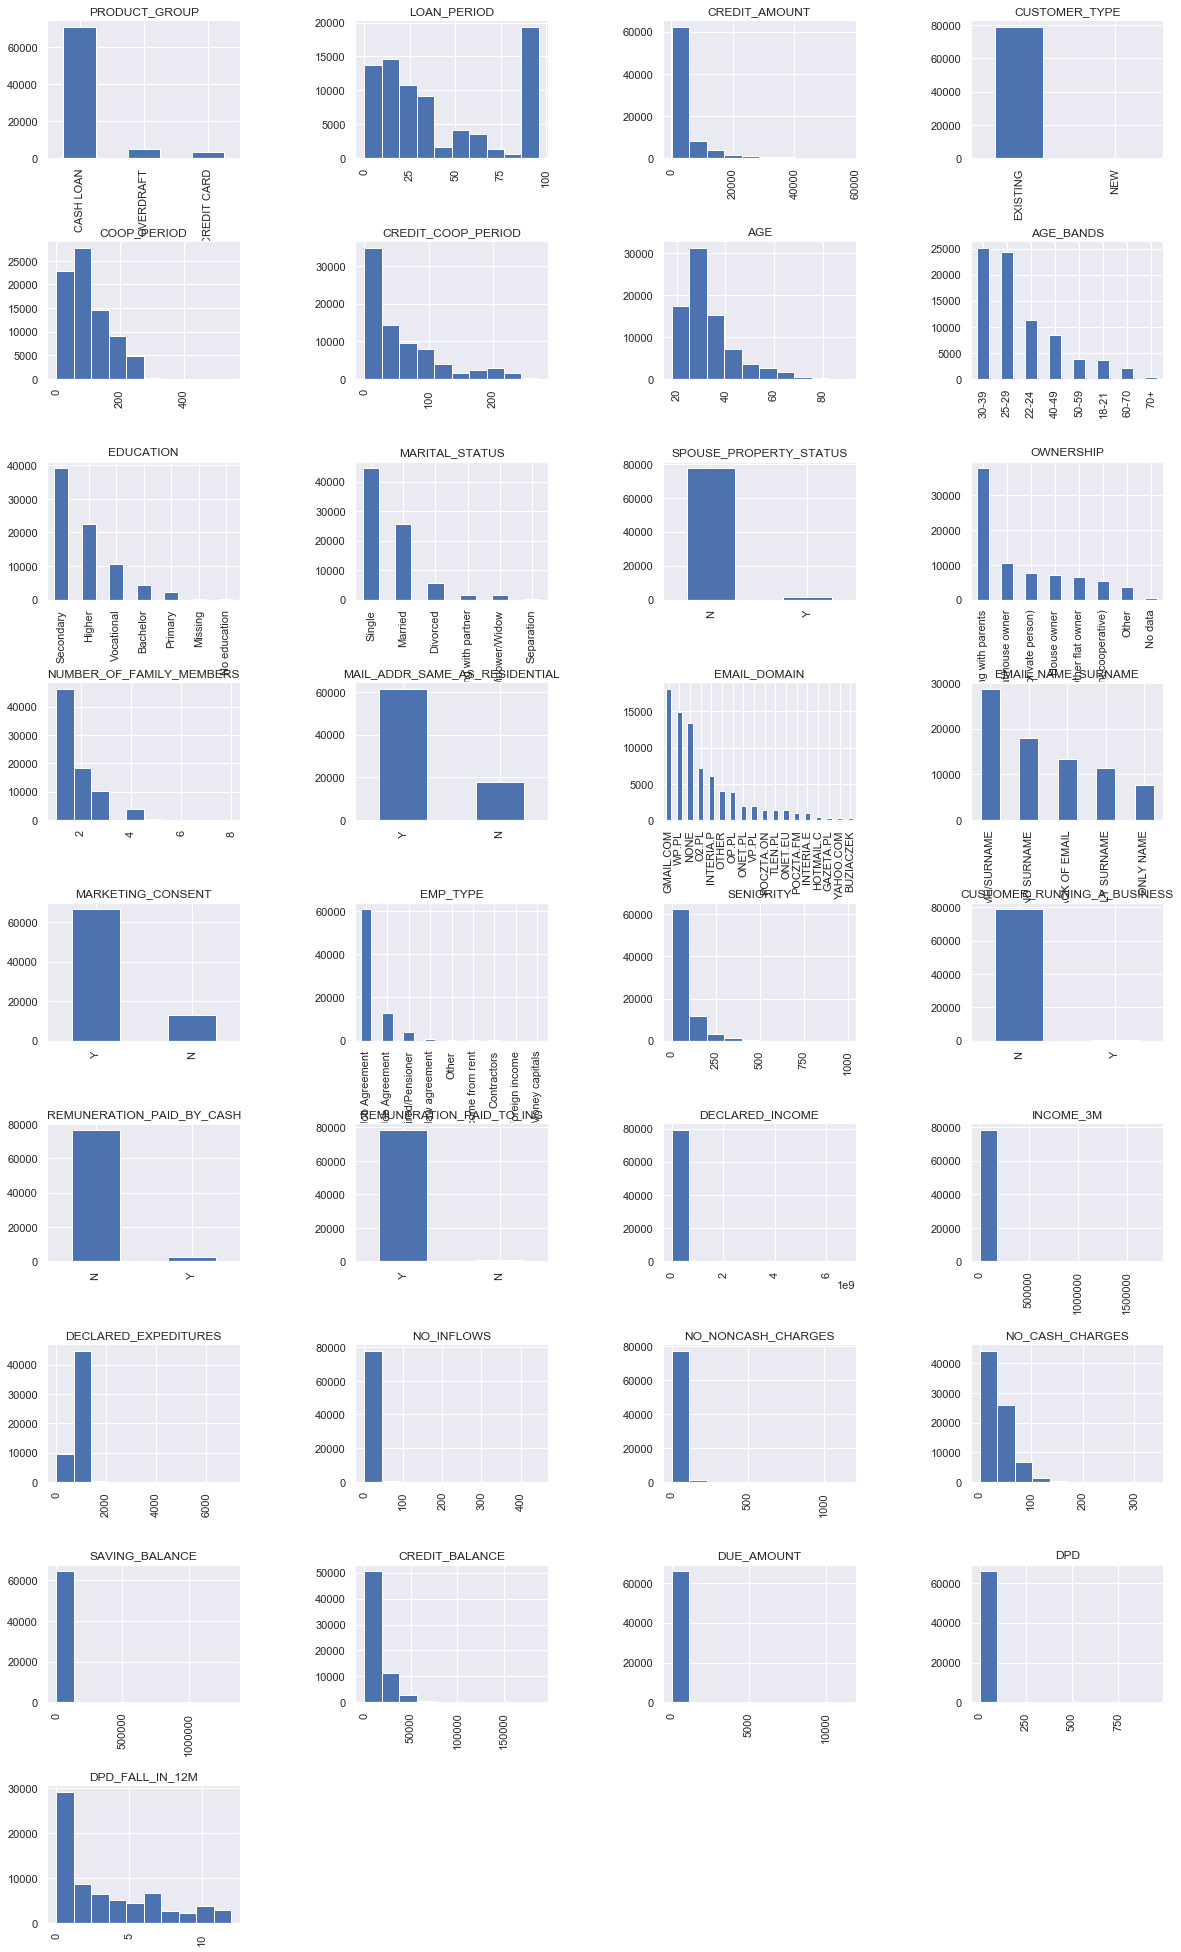

In [85]:
data_to_plot = data[[
 'PRODUCT_GROUP',
 'LOAN_PERIOD',
 'CREDIT_AMOUNT',
 'CUSTOMER_TYPE',
 'COOP_PERIOD',
 'CREDIT_COOP_PERIOD',
 'AGE',
 'AGE_BANDS',
 'EDUCATION',
 'MARITAL_STATUS',
 'SPOUSE_PROPERTY_STATUS',
 'OWNERSHIP',
 'NUMBER_OF_FAMILY_MEMBERS',
 'MAIL_ADDR_SAME_AS_RESIDENTIAL',
 'EMAIL_DOMAIN',
 'EMAIL_NAME_SURNAME',
 'MARKETING_CONSENT',
 'EMP_TYPE',
 'SENIORITY',
 'CUSTOMER_RUNNING_A_BUSINESS',
 'REMUNERATION_PAID_BY_CASH',
 'REMUNERATION_PAID_TO_ING',
 'DECLARED_INCOME',
 'INCOME_3M',
 'DECLARED_EXPEDITURES',
 'NO_INFLOWS',
 'NO_NONCASH_CHARGES',
 'NO_CASH_CHARGES',
 'SAVING_BALANCE',
 'CREDIT_BALANCE',
 'DUE_AMOUNT',
 'DPD',
 'DPD_FALL_IN_12M']]

fig=plt.figure(figsize=(20,35))
col=4
rows=math.ceil(float(data_to_plot.shape[1])/col)
for i, column in enumerate(data_to_plot.columns):
    ax=fig.add_subplot(rows,col, i+1)
    ax.set_title(column)
    if data_to_plot.dtypes[column]==np.object:
        data_to_plot[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_to_plot[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.6,wspace=0.6)

In [86]:
data_numerical = data[["INCOME_3M", "DECLARED_INCOME", "SAVING_BALANCE", "DECLARED_EXPEDITURES",
                      "CREDIT_BALANCE", "DUE_AMOUNT", "NO_NONCASH_CHARGES", "NO_CASH_CHARGES"]]
pd.options.display.float_format = "{:.2f}".format
data_numerical.describe()

,INCOME_3M,DECLARED_INCOME,SAVING_BALANCE,DECLARED_EXPEDITURES,CREDIT_BALANCE,DUE_AMOUNT,NO_NONCASH_CHARGES,NO_CASH_CHARGES
count,78384.00,79155.00,64496.00,54563.00,65876.00,65876.00,78384.00,78384.00
mean,8288.96,91034.33,2133.99,851.90,12404.07,7.04,22.78,35.13
std,12351.02,24181305.56,13767.83,265.17,14052.93,72.58,24.88,26.12
min,100.00,860.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3600.00,2150.00,0.00,705.91,2470.00,0.00,9.00,16.00
50%,5600.00,2680.00,0.00,940.00,7400.00,0.00,14.00,30.00
75%,9200.00,3490.00,300.00,983.00,17670.00,0.00,26.00,48.00
max,1781100.00,6802954260.00,1320900.00,7000.00,187260.00,11370.00,1151.00,340.00


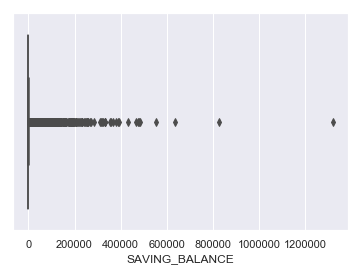

In [87]:
sns.boxplot(x=data['SAVING_BALANCE'])

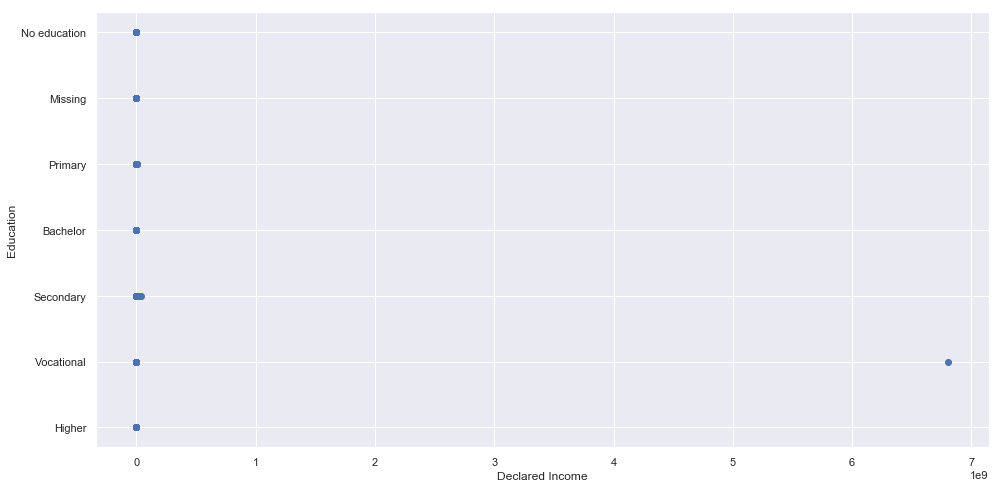

In [88]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['DECLARED_INCOME'], data['EDUCATION'])
ax.set_xlabel('Declared Income')
ax.set_ylabel('Education')
plt.show()

Removing outliers

In [89]:
def remove_outlier(data_1, col_name):
    mean_1 = np.mean(data_1[col_name])
    std_1 =np.std(data_1[col_name])
    
    df_out = data_1.drop(data_1[((data_1[col_name] - 
                        mean_1) / std_1).abs() > 3].index)
    return df_out

In [90]:
data = remove_outlier(data, 'SAVING_BALANCE')

In [91]:
data = remove_outlier(data, "DECLARED_INCOME")

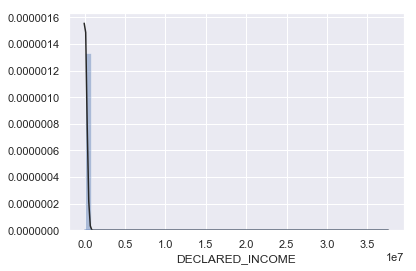

In [92]:
sns.distplot(data['DECLARED_INCOME'], fit=stats.norm)

In [93]:
data['DECLARED_INCOME']=np.log(data['DECLARED_INCOME'])

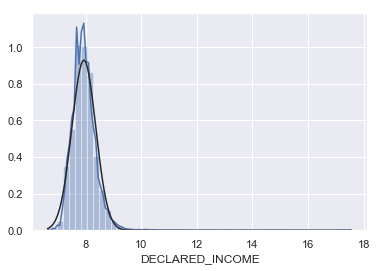

In [94]:
sns.distplot(data['DECLARED_INCOME'], fit=stats.norm)

Filling missing data

Based on data description, there are applied two ways of filling missing data:
1. with mean, when NaN in data means that there is no availale information (like Saving_balance, where NaN means that client do not have saving account in ING, but it does not mean that the client has no savings)
2. with zeros, when NaN in data means actual lack of particular feature (like NaN  in BIK_ACC_NUM_TOTAL_CLOSE means the client has no history in BIK)

In [95]:
list_average = ['DECLARED_INCOME', 'SAVING_BALANCE', 'NO_INFLOWS', 'INCOME_3M', 'DECLARED_EXPEDITURES',
               'CREDIT_BALANCE', 'NO_NONCASH_CHARGES', 'NO_CASH_CHARGES', 'CREDIT_BALANCE_TO_LIMIT']

for column in list_average:
    data[column] = data[column].fillna(data[column].mean())

In [96]:
list_zeros = ['DUE_AMOUNT', 'DPD', 'DPD_FALL_IN_12M', 'BIK_ACC_NUM_TOTAL_CLOSE',
             'BIK_ACC_NUM_TOTAL_OPEN', 'BIK_BAL_TOTAL_OPEN', 'BIK_OVERDUE_12M_TOTAL_MAX',
             'BIK_OVERDUE_EVER_TOTAL_MAX']

for column in list_zeros:
    data[column] = data[column].fillna(0)

In [97]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
CUSTOMER_ID                      0
APPLICATION_ID                   0
DEFAULT_FLAG                     0
APPLICATION_DATE                 0
APPLICATION_HOUR                 0
APPLICATION_WEEKDAY              0
APPLICATION_MONTH                0
APPLICATION_YEAR                 0
PRODUCT_GROUP                    0
LOAN_PERIOD                      0
CREDIT_AMOUNT                    0
CUSTOMER_TYPE                    0
COOP_PERIOD                      0
CREDIT_COOP_PERIOD               0
AGE                              0
AGE_BANDS                        0
EDUCATION                        0
MARITAL_STATUS                   0
SPOUSE_PROPERTY_STATUS           0
OWNERSHIP                        0
NUMBER_OF_FAMILY_MEMBERS         0
MAIL_ADDR_SAME_AS_RESIDENTIAL    0
EMAIL_DOMAIN                     0
EMAIL_NAME_SURNAME               0
MARKETING_CONSENT                0
EMP_TYPE                         0
SENIORITY                        0
CUSTOMER_RUNNING_

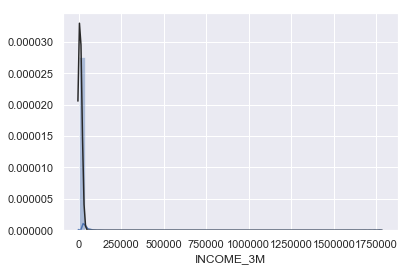

In [98]:
sns.distplot(data['INCOME_3M'], fit=stats.norm)

In [99]:
data['INCOME_3M']=np.log(data['INCOME_3M'])

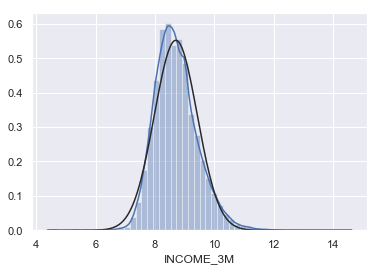

In [100]:
sns.distplot(data['INCOME_3M'], fit=stats.norm)

Transforming data into numerical form

In [101]:
data.EMAIL_NAME_SURNAME.value_counts()/data.shape[0]

LACK OF NAME/SURNAME   0.36
NAME AND SURNAME       0.23
LACK OF EMAIL          0.17
ONLY SURNAME           0.14
ONLY NAME              0.10
Name: EMAIL_NAME_SURNAME, dtype: float64

In [102]:
EMAIL_NAME_SURNAME_dict= {
        'LACK OF NAME/SURNAME': 0,
        'NAME AND SURNAME': 1,
        'LACK OF EMAIL': 0,
        'ONLY SURNAME': 1,
        'ONLY NAME': 1,
    }
data['EMAIL_NAME_SURNAME_after_dict'] = data['EMAIL_NAME_SURNAME'].map(EMAIL_NAME_SURNAME_dict)

In [103]:
data.EMP_TYPE.value_counts()/data.shape[0]

Permanent Job Agreement   0.77
Term Job Agreement        0.16
Retired/Pensioner         0.05
Civil law agreement       0.01
Other                     0.00
Income from rent          0.00
Contractors               0.00
Foreign income            0.00
Money capitals            0.00
Name: EMP_TYPE, dtype: float64

In [104]:
data['EMP_TYPE_code'] = np.where(data['EMP_TYPE'].str.contains('Permanent Job Agreement'), 1, 0)

In [105]:
data.EMAIL_DOMAIN.value_counts()/data.shape[0] #two domains with higher frequency will be kept, other
                                               #assign to "other"

GMAIL.COM   0.23
WP.PL       0.19
NONE        0.17
O2.PL       0.09
INTERIA.P   0.08
OTHER       0.05
OP.PL       0.05
ONET.PL     0.03
VP.PL       0.02
TLEN.PL     0.02
POCZTA.ON   0.02
ONET.EU     0.02
POCZTA.FM   0.01
INTERIA.E   0.01
HOTMAIL.C   0.01
GAZETA.PL   0.00
YAHOO.COM   0.00
BUZIACZEK   0.00
Name: EMAIL_DOMAIN, dtype: float64

In [106]:
EMAIL_DOMAIN_dict= {
        'GMAIL.COM': 'GMAIL',
        'WP.PL': 'WP',
    }
data['EMAIL_DOMAIN_after_dict'] = data['EMAIL_DOMAIN'].map(EMAIL_DOMAIN_dict)
data['EMAIL_DOMAIN_after_dict'] = data['EMAIL_DOMAIN_after_dict'].fillna("other")

In [107]:
data.MARITAL_STATUS.value_counts()/data.shape[0]

Single                0.56
Married               0.32
Divorced              0.07
Living with partner   0.02
Widower/Widow         0.02
Separation            0.00
Name: MARITAL_STATUS, dtype: float64

In [108]:
#all singles get 0
MARITAL_STATUS_dict= {
        'Single': 0,
        'Married': 1,
        'Divorced': 0,
        'Living with partner': 1,
        'Widower/Widow': 0,
        'Separation': 0,
    }
data['MARITAL_STATUS_after_dict'] = data['MARITAL_STATUS'].map(MARITAL_STATUS_dict)

In [109]:
data.BIK_GRP.value_counts()/data.shape[0]

CREDIT HISTORY (FULL DATA)    0.85
CREDIT HISTORY  (PART DATA)   0.08
NO CREDIT HISTORY             0.06
Name: BIK_GRP, dtype: float64

In [110]:
BIK_GRP_dict= {
        'CREDIT HISTORY (FULL DATA)': 1,
        'CREDIT HISTORY  (PART DATA)': 0,
        'NO CREDIT HISTORY': 0,
    }
data['BIK_GRP_after_dict'] = data['BIK_GRP'].map(BIK_GRP_dict)

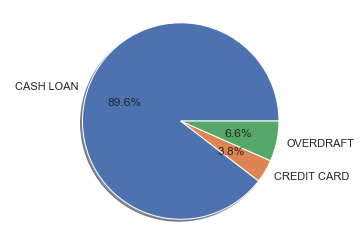

In [111]:
labels = data['PRODUCT_GROUP'].astype('category').cat.categories.tolist()
counts = data['PRODUCT_GROUP'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [112]:
#overdrafts and credit cards have similar characteristic and from the risk management perpescive 
#are the same products, so they are agrregated together

data['cl_code'] = np.where(data['PRODUCT_GROUP'].str.contains('CASH LOAN'), 1, 0)

Text(0.5, 0, 'EDUCATION')

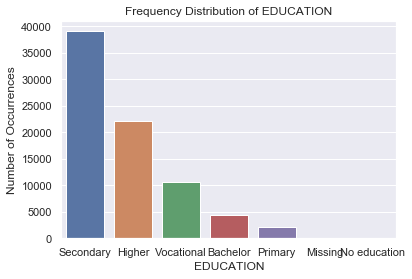

In [113]:
EDUCATION = data['EDUCATION'].value_counts()
sns.set(style="darkgrid")
sns.barplot(EDUCATION.index, EDUCATION.values)
plt.title('Frequency Distribution of EDUCATION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('EDUCATION', fontsize=12)

In [114]:
#The wages are assigned to education level
Education_dict= {
        'Secondary': 2,
        'Higher': 3,
        'Vocational': 2,
        'Bachelor': 3,
        'Primary': 1,
        'Missing': 0,
        'No education': 0,
    }
data['education_code'] = data['EDUCATION'].map(Education_dict)

In [115]:
# LabelEncoder is used for field where only two possible values occure
list_LE = ['CUSTOMER_TYPE', 'SPOUSE_PROPERTY_STATUS', 'MAIL_ADDR_SAME_AS_RESIDENTIAL',
          'MARKETING_CONSENT', 'CUSTOMER_RUNNING_A_BUSINESS', 'REMUNERATION_PAID_BY_CASH',
          'REMUNERATION_PAID_TO_ING']

lb_make = LabelEncoder()

for column in list_LE:
    data[column + '_code'] = lb_make.fit_transform(data[column])

In [116]:
# get_dummies is used for columns where there are more than two possible values 
list_GD = ['OWNERSHIP', 'EMAIL_DOMAIN_after_dict']

for column in list_GD:
    data = pd.get_dummies(data, columns=[column], prefix = [column])

In [117]:
data.head()

,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_DATE,APPLICATION_HOUR,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,PRODUCT_GROUP,LOAN_PERIOD,CREDIT_AMOUNT,CUSTOMER_TYPE,COOP_PERIOD,CREDIT_COOP_PERIOD,AGE,AGE_BANDS,EDUCATION,MARITAL_STATUS,SPOUSE_PROPERTY_STATUS,NUMBER_OF_FAMILY_MEMBERS,MAIL_ADDR_SAME_AS_RESIDENTIAL,EMAIL_DOMAIN,EMAIL_NAME_SURNAME,MARKETING_CONSENT,EMP_TYPE,SENIORITY,CUSTOMER_RUNNING_A_BUSINESS,REMUNERATION_PAID_BY_CASH,REMUNERATION_PAID_TO_ING,DECLARED_INCOME,INCOME_3M,DECLARED_EXPEDITURES,NO_INFLOWS,NO_NONCASH_CHARGES,NO_CASH_CHARGES,SAVING_BALANCE,CREDIT_BALANCE,CREDIT_BALANCE_TO_LIMIT,DUE_AMOUNT,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_GRP,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX,EMAIL_NAME_SURNAME_after_dict,EMP_TYPE_code,MARITAL_STATUS_after_dict,BIK_GRP_after_dict,cl_code,education_code,CUSTOMER_TYPE_code,SPOUSE_PROPERTY_STATUS_code,MAIL_ADDR_SAME_AS_RESIDENTIAL_code,MARKETING_CONSENT_code,CUSTOMER_RUNNING_A_BUSINESS_code,REMUNERATION_PAID_BY_CASH_code,REMUNERATION_PAID_TO_ING_code,OWNERSHIP_Cooperative flat/house owner,OWNERSHIP_House owner,OWNERSHIP_Living with parents,OWNERSHIP_No data,OWNERSHIP_Other,OWNERSHIP_Other flat owner,"OWNERSHIP_Renter (council,government,cooperative)",OWNERSHIP_Renter (from private person),EMAIL_DOMAIN_after_dict_GMAIL,EMAIL_DOMAIN_after_dict_WP,EMAIL_DOMAIN_after_dict_other
0,102528122,362000000000.00,0,2017-05-10,24-lip,3,5,2017,CASH LOAN,96,4200,EXISTING,44,34,29,25-29,Higher,Single,N,1,N,GMAIL.COM,ONLY SURNAME,Y,Permanent Job Agreement,12,N,N,Y,8.29,9.22,1071.83,6.00,22.00,16.00,0.00,19140.00,0.91,0.00,0.00,4.00,2,3,CREDIT HISTORY (FULL DATA),5.00,9.00,19250.00,0.00,0.00,1,1,0,1,1,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,146634735,636000000000.00,0,2016-01-09,24-lip,7,1,2016,CASH LOAN,36,11100,EXISTING,52,39,25,25-29,Higher,Single,N,1,N,WP.PL,ONLY SURNAME,Y,Permanent Job Agreement,19,N,N,Y,8.63,8.88,1080.00,8.00,8.00,68.00,1235.34,12416.68,0.77,0.00,0.00,8.00,2,2,CREDIT HISTORY (FULL DATA),1.00,2.00,10950.00,0.00,3244.00,1,1,0,1,1,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,996453767,695000000000.00,0,2016-07-07,24-lip,5,7,2016,OVERDRAFT,0,800,EXISTING,147,25,43,40-49,Vocational,Married,N,3,Y,O2.PL,ONLY NAME,Y,Term Job Agreement,48,N,N,Y,7.64,8.46,882.74,4.00,4.00,76.00,0.00,12416.68,0.77,0.00,0.00,1.00,1,0,CREDIT HISTORY (FULL DATA),3.00,1.00,4650.00,67.00,67.00,1,0,1,1,0,2,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,816020174,989000000000.00,0,2016-07-20,24-lip,3,7,2016,CASH LOAN,36,5900,EXISTING,73,27,25,25-29,Higher,Single,N,1,Y,GMAIL.COM,LACK OF NAME/SURNAME,Y,Term Job Agreement,24,Y,N,Y,7.86,9.59,940.00,6.00,12.00,29.00,1235.34,32360.00,0.95,0.00,0.00,10.00,1,18,CREDIT HISTORY (FULL DATA),7.00,5.00,33300.00,0.00,1.00,0,0,0,1,1,3,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0
4,930630805,77906299419.00,0,2015-06-30,24-lip,3,6,2015,CASH LOAN,5,1400,EXISTING,82,28,30,30-39,Higher,Single,N,1,Y,OTHER,ONLY SURNAME,Y,Permanent Job Agreement,48,N,N,Y,8.41,9.74,850.48,16.00,56.00,6.00,0.00,3120.00,1.00,0.00,0.00,0.00,3,9,CREDIT HISTORY (PART DATA),13.00,2.00,3100.00,0.00,0.00,1,1,0,0,1,3,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [118]:
#Columns to delete: those which are not need anymore after application of LabelEncoder, or those which has
#no meaning like "Application_id"

list_to_drop = ["EDUCATION", "PRODUCT_GROUP", "APPLICATION_ID", "APPLICATION_YEAR", "APPLICATION_MONTH",
                            "APPLICATION_WEEKDAY", "CUSTOMER_ID", "AGE_BANDS", 'CUSTOMER_TYPE', 
                            'SPOUSE_PROPERTY_STATUS', 'MAIL_ADDR_SAME_AS_RESIDENTIAL', 
                            'MARKETING_CONSENT', 'CUSTOMER_RUNNING_A_BUSINESS',
                            'REMUNERATION_PAID_BY_CASH', 'REMUNERATION_PAID_TO_ING', 'APPLICATION_DATE',
                            'APPLICATION_HOUR', 'EMAIL_NAME_SURNAME', 'EMP_TYPE', 'EMAIL_DOMAIN',
                            'MARITAL_STATUS', 'BIK_GRP']

In [119]:
df_numeric = data.drop(list_to_drop, axis =1)

In [120]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78577 entries, 0 to 79154
Data columns (total 51 columns):
DEFAULT_FLAG                                         78577 non-null int64
LOAN_PERIOD                                          78577 non-null int64
CREDIT_AMOUNT                                        78577 non-null int64
COOP_PERIOD                                          78577 non-null int64
CREDIT_COOP_PERIOD                                   78577 non-null int64
AGE                                                  78577 non-null int64
NUMBER_OF_FAMILY_MEMBERS                             78577 non-null int64
SENIORITY                                            78577 non-null int64
DECLARED_INCOME                                      78577 non-null float64
INCOME_3M                                            78577 non-null float64
DECLARED_EXPEDITURES                                 78577 non-null float64
NO_INFLOWS                                           78577 non-null flo

In [121]:
df_numeric.shape

(78577, 51)

In [123]:
#import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, roc_auc_score
from imblearn.metrics import sensitivity_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import  metrics
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from keras.layers import Dense, Dropout
from keras.models import Sequential
from imblearn.over_sampling import SMOTE
from keras.callbacks import EarlyStopping, ModelCheckpoint
seed = (7)

In [124]:
accuracy = []
balanced_accuracy = []
roc_auc_list = []
sensitivity_list = []

In [125]:
df_numeric["DEFAULT_FLAG"].value_counts()

0    75225
1     3352
Name: DEFAULT_FLAG, dtype: int64

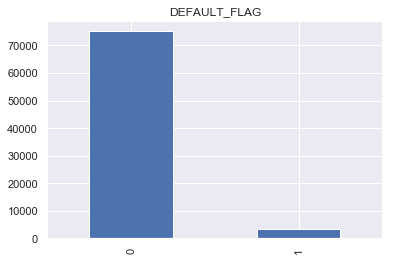

In [126]:
count_class_0, count_class_1 = df_numeric["DEFAULT_FLAG"].value_counts()
data_class_0=df_numeric[df_numeric["DEFAULT_FLAG"]==0]
data_class_1=df_numeric[df_numeric["DEFAULT_FLAG"]==1]

df_numeric["DEFAULT_FLAG"].value_counts().plot(kind='bar', title='DEFAULT_FLAG')

In [127]:
y = df_numeric["DEFAULT_FLAG"]
X = df_numeric.drop("DEFAULT_FLAG", axis = 1)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52, stratify=y)

In [129]:
column_names = X_train.columns

In [130]:
scaler = MinMaxScaler().fit(X_train)

X_test = scaler.transform(X_test)
X_train_transformed = scaler.transform(X_train)

C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [131]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns = column_names)
X_test = pd.DataFrame(X_test, columns = column_names)

In [132]:
y_train.value_counts()

0    56418
1     2514
Name: DEFAULT_FLAG, dtype: int64

In [133]:
y_test.value_counts()

0    18807
1      838
Name: DEFAULT_FLAG, dtype: int64

In [134]:
#Because y values are unbalances, all of the positive records (y=1) will be kept,
#and 3 * number of positive records will be randomly choose to prepare train data.
#In order to optimise the process of randomization, data are divided into clusters 
neg = X_train_transformed.loc[y_train.values == 0]
pos = X_train_transformed.loc[y_train.values == 1]

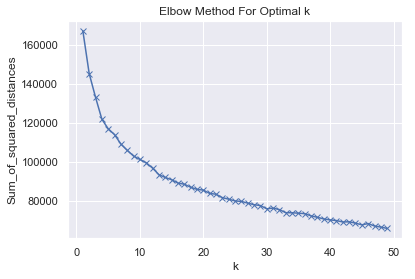

In [55]:
'''#elbow plow is draw in order to estimate the number of clusters 
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(neg)
    Sum_of_squared_distances.append(km.inertia_)
    
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()'''

In [135]:
#definition of function used to kmeans model on data with y = 0
#N = 40 based on above elbow plot. In fact plot don't point specificale on 40, but for randomization
#purposes only, not moddeling, I decided to set number of clusters to 40 
def Kmeans_reduction (data, N=40):
    k_means = KMeans(n_clusters=N, random_state=52)
    k_means.fit(data)
    return k_means.labels_ 

In [136]:
neg["cluster_label"] = Kmeans_reduction(neg)

C:\Users\Kinga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
number_of_neg = pos.shape[0] * 3

In [138]:
number_of_samples_from_one_cluster = round(number_of_neg / 40)

In [139]:
#definition of function used to draw the data with negative y
def samples_from_clusters (X, samples_per_cluster = 2, group_column = 'cluster_label', replace=False):
    fn = lambda obj: obj.loc[np.random.choice(obj.index, samples_per_cluster, replace=replace), :]
    X = X.groupby(group_column, as_index = False).apply(fn)
    return X

In [140]:
X_train_after_kmeans_clustering = samples_from_clusters(neg, number_of_samples_from_one_cluster)

In [141]:
X_train_after_kmeans_clustering = X_train_after_kmeans_clustering.drop(["cluster_label"], axis = 1)

In [142]:
X_train_after_kmeans_clustering["DEFAULT_FLAG"] = 0
pos["DEFAULT_FLAG"] = 1

C:\Users\Kinga\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [143]:
New_Data_Train = pd.concat([X_train_after_kmeans_clustering, pos])

In [144]:
#after "concat" all positive labels are at the end of data. I shuffle data because I will use 
#validation_split in neural network
New_Data_Train = New_Data_Train.sample(frac=1).reset_index(drop=True)

In [145]:
y_train = New_Data_Train["DEFAULT_FLAG"]
X_train = New_Data_Train.drop(["DEFAULT_FLAG"], axis = 1)

GridSearchCV on Random Forest Classifier

In [146]:
rfc=RandomForestClassifier(random_state=52)

param_grid = { 
    'n_estimators': [100, 150, 200, 250], 
    'max_features': [0.8, 0.9, 'auto'],
    'max_depth' : [4, 6, 8, 10, 12],
    'min_samples_leaf' :[0.001, 0.01, 0.02, 1, 2, 4]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1)
CV_rfc.fit(X_train, y_train)
best_rfc = CV_rfc.best_estimator_
pred_train_rfc=best_rfc.predict(X_train)
pred_test_rfc=best_rfc.predict(X_test)
accuracy.append(accuracy_score(y_test,pred_test_rfc))
balanced_accuracy.append(balanced_accuracy_score(y_test,pred_test_rfc))
roc_auc_list.append(roc_auc_score(y_test, pred_test_rfc))
sensitivity_list.append(sensitivity_score(y_test, pred_test_rfc))
print("Balanced accuracy for Random Forest Classifier on train data: ",balanced_accuracy_score(y_train,pred_train_rfc))
print("Balanced accuracy for Random Forest Classifier on test data: ",balanced_accuracy_score(y_test,pred_test_rfc))

Balanced accuracy for Random Forest Classifier on train data:  0.8770897261052393
Balanced accuracy for Random Forest Classifier on test data:  0.7090586224877169


In [147]:
CV_rfc.best_params_

{'max_depth': 12,
 'max_features': 0.9,
 'min_samples_leaf': 2,
 'n_estimators': 250}

GridSearchCV on XGB Classifier

In [148]:
xgb = XGBClassifier(objective='binary:logistic', random_state=52)

param_grid_xgb = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_deph":[3, 5, 7, 9, 11],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.5, 0.8, 1],
    "n_estimators ": [50, 100, 200, 250],
}

CV_xgb=GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1)
CV_xgb.fit(X_train, y_train)
best_xgb = CV_xgb.best_estimator_
pred_train_xgb = best_xgb.predict(X_train)
pred_test_xgb = best_xgb.predict(X_test)
accuracy.append(accuracy_score(y_test,pred_test_xgb))
balanced_accuracy.append(balanced_accuracy_score(y_test,pred_test_xgb))
roc_auc_list.append(roc_auc_score(y_test, pred_test_xgb))
sensitivity_list.append(sensitivity_score(y_test, pred_test_xgb))
print("Balanced accuracy for XGBClassifier on train data: ",balanced_accuracy_score(y_train,pred_train_xgb))
print("Balanced accuracy for XGBClassifier on test data: ",balanced_accuracy_score(y_test,pred_test_xgb))

Balanced accuracy for XGBClassifier on train data:  0.7571505916076322
Balanced accuracy for XGBClassifier on test data:  0.7075162310077762


In [149]:
CV_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_deph': 3,
 'n_estimators ': 50,
 'subsample': 0.7}

GridSearchCV on Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=52)

param_grid_lr = { 
    'C': np.logspace(-4, 4, 20), 
    'penalty': ['l1', 'l2'],
}

CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=3, n_jobs=-1)
CV_lr.fit(X_train, y_train)
best_lr = CV_lr.best_estimator_
pred_train_lr = best_lr.predict(X_train)
pred_test_lr = best_lr.predict(X_test)
accuracy.append(accuracy_score(y_test,pred_test_lr))
balanced_accuracy.append(balanced_accuracy_score(y_test,pred_test_lr))
roc_auc_list.append(roc_auc_score(y_test, pred_test_lr))
sensitivity_list.append(sensitivity_score(y_test, pred_test_lr))
print("Balanced Accuracy for Logistic Regression on train data: ",balanced_accuracy_score(y_train,pred_train_lr))
print("Balanced Accuracy for Logistic Regression on test data: ",balanced_accuracy_score(y_test,pred_test_lr))


C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706

Balanced Accuracy for Logistic Regression on train data:  0.6684072369334899
Balanced Accuracy for Logistic Regression on test data:  0.6627136559750958


In [151]:
CV_lr.best_params_

{'C': 4.281332398719396, 'penalty': 'l1'}

In [152]:
tree = DecisionTreeClassifier(random_state=52)

param_grid_tree = { 
    'max_depth': [4,6, 8, 10, 12, 14],
    'min_samples_leaf' :[0.001, 0.01, 0.02, 1, 2, 4],
    'max_features': [0.8, 0.9]
}

CV_tree = GridSearchCV(estimator=tree, param_grid=param_grid_tree, cv=3, n_jobs=-1)
CV_tree.fit(X_train, y_train)
best_tree = CV_tree.best_estimator_
pred_train_tree = best_tree.predict(X_train)
pred_test_tree = best_tree.predict(X_test)
accuracy.append(accuracy_score(y_test,pred_test_tree))
balanced_accuracy.append(balanced_accuracy_score(y_test,pred_test_tree))
roc_auc_list.append(roc_auc_score(y_test, pred_test_tree))
sensitivity_list.append(sensitivity_score(y_test, pred_test_tree))
print("Balanced Accuracy for Decision Tree on train data: ",balanced_accuracy_score(y_train,pred_train_tree))
print("Balanced Accuracy for Decision Tree on test data: ",balanced_accuracy_score(y_test,pred_test_tree))

C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706

Balanced Accuracy for Decision Tree on train data:  0.6913391357603769
Balanced Accuracy for Decision Tree on test data:  0.6632005132400685


In [153]:
CV_tree.best_params_

{'max_depth': 6, 'max_features': 0.9, 'min_samples_leaf': 2}

Neural Network 

In [154]:
def MLP_classifier(neurons):
    
    model = Sequential()
    
    model.add(Dense(neurons[0], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(neurons[1], activation='relu'))
    model.add(Dense(neurons[2], activation='softmax'))
    
    return model

In [155]:
neurons_combination = [[256, 128, 2], [256, 256, 2], [128, 256, 2], [12, 8, 2], [24, 12, 2]]
batch_sizes = [32, 128, 1024, 2048]
epochs = 30


details = {}

for i, neurons in enumerate(neurons_combination):
    for batch in batch_sizes:
        model_name = 'NN_{}_{}'.format(i, batch)
        MLP = MLP_classifier(neurons)
        
        callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')]
        
        MLP.compile(loss='sparse_categorical_crossentropy', 
                            optimizer='nadam', 
                            metrics=['accuracy'])
        
        MLP.fit(X_train, y_train, 
                        verbose=1, 
                        batch_size=batch, 
                        epochs=epochs, 
                        validation_split = 0.2,
                        callbacks=callbacks)
        
        y_pred = MLP.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)

        bal_acc = balanced_accuracy_score(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        sen = sensitivity_score(y_test, y_pred)
        details[model_name] = [bal_acc, acc, auc, sen]

df = pd.DataFrame.from_dict(details, orient='index', columns=['Balanced_Accuracy', 'Accuracy',
                                                             'ROC_AUC_SCORE', "Sensitivity"])
        

Train on 8059 samples, validate on 2015 samples
Epoch 1/30
8059/8059 [==============================] - 2s 228us/step - loss: 0.4673 - acc: 0.7755 - val_loss: 0.4600 - val_acc: 0.7806
Epoch 2/30
8059/8059 [==============================] - 1s 77us/step - loss: 0.4374 - acc: 0.7928 - val_loss: 0.4524 - val_acc: 0.7896
Epoch 3/30
8059/8059 [==============================] - 1s 80us/step - loss: 0.4260 - acc: 0.7995 - val_loss: 0.4681 - val_acc: 0.7772
Epoch 4/30
8059/8059 [==============================] - 1s 81us/step - loss: 0.4186 - acc: 0.8006 - val_loss: 0.4285 - val_acc: 0.7995
Epoch 5/30
8059/8059 [==============================] - 1s 82us/step - loss: 0.4110 - acc: 0.8082 - val_loss: 0.4245 - val_acc: 0.7901
Epoch 6/30
8059/8059 [==============================] - 1s 86us/step - loss: 0.4034 - acc: 0.8116 - val_loss: 0.4259 - val_acc: 0.8025
Epoch 7/30
8059/8059 [==============================] - 1s 81us/step - loss: 0.3968 - acc: 0.8141 - val_loss: 0.4503 - val_acc: 0.7906
Epoch 

8059/8059 [==============================] - 0s 7us/step - loss: 0.4540 - acc: 0.7851 - val_loss: 0.5119 - val_acc: 0.7583
Epoch 16/30
8059/8059 [==============================] - 0s 6us/step - loss: 0.4329 - acc: 0.7965 - val_loss: 0.4392 - val_acc: 0.7891
Epoch 17/30
8059/8059 [==============================] - 0s 5us/step - loss: 0.4134 - acc: 0.8001 - val_loss: 0.4376 - val_acc: 0.7921
Epoch 18/30
8059/8059 [==============================] - 0s 6us/step - loss: 0.4172 - acc: 0.8008 - val_loss: 0.4433 - val_acc: 0.7891
Train on 8059 samples, validate on 2015 samples
Epoch 1/30
8059/8059 [==============================] - 2s 242us/step - loss: 0.4623 - acc: 0.7785 - val_loss: 0.4408 - val_acc: 0.7866
Epoch 2/30
8059/8059 [==============================] - 1s 87us/step - loss: 0.4341 - acc: 0.7961 - val_loss: 0.4361 - val_acc: 0.7945
Epoch 3/30
8059/8059 [==============================] - 1s 93us/step - loss: 0.4248 - acc: 0.7976 - val_loss: 0.4327 - val_acc: 0.7955
Epoch 4/30
8059/80

8059/8059 [==============================] - 0s 7us/step - loss: 0.4559 - acc: 0.7788 - val_loss: 0.4655 - val_acc: 0.7707
Epoch 10/30
8059/8059 [==============================] - 0s 7us/step - loss: 0.4380 - acc: 0.7903 - val_loss: 0.4492 - val_acc: 0.7821
Epoch 11/30
8059/8059 [==============================] - 0s 7us/step - loss: 0.4272 - acc: 0.7923 - val_loss: 0.4401 - val_acc: 0.7831
Epoch 12/30
8059/8059 [==============================] - 0s 7us/step - loss: 0.4219 - acc: 0.7967 - val_loss: 0.4387 - val_acc: 0.7856
Epoch 13/30
8059/8059 [==============================] - 0s 8us/step - loss: 0.4418 - acc: 0.7864 - val_loss: 0.6059 - val_acc: 0.7489
Epoch 14/30
8059/8059 [==============================] - 0s 8us/step - loss: 0.4661 - acc: 0.7858 - val_loss: 0.4399 - val_acc: 0.7846
Epoch 15/30
8059/8059 [==============================] - 0s 7us/step - loss: 0.4197 - acc: 0.7964 - val_loss: 0.4370 - val_acc: 0.7851
Epoch 16/30
8059/8059 [==============================] - 0s 6us/ste

Epoch 20/30
8059/8059 [==============================] - 0s 7us/step - loss: 0.3964 - acc: 0.8144 - val_loss: 0.4370 - val_acc: 0.7950
Epoch 21/30
8059/8059 [==============================] - 0s 7us/step - loss: 0.3922 - acc: 0.8162 - val_loss: 0.4430 - val_acc: 0.7965
Epoch 22/30
8059/8059 [==============================] - 0s 8us/step - loss: 0.3809 - acc: 0.8238 - val_loss: 0.4316 - val_acc: 0.7945
Epoch 23/30
8059/8059 [==============================] - 0s 8us/step - loss: 0.4062 - acc: 0.8115 - val_loss: 0.4285 - val_acc: 0.7931
Epoch 24/30
8059/8059 [==============================] - 0s 8us/step - loss: 0.3765 - acc: 0.8267 - val_loss: 0.4316 - val_acc: 0.7990
Epoch 25/30
8059/8059 [==============================] - 0s 7us/step - loss: 0.3700 - acc: 0.8288 - val_loss: 0.4337 - val_acc: 0.7950
Epoch 26/30
8059/8059 [==============================] - 0s 7us/step - loss: 0.3671 - acc: 0.8306 - val_loss: 0.4364 - val_acc: 0.7901
Epoch 27/30
8059/8059 [==============================] 

Epoch 22/30
8059/8059 [==============================] - 0s 41us/step - loss: 0.4014 - acc: 0.8121 - val_loss: 0.4223 - val_acc: 0.8109
Epoch 23/30
8059/8059 [==============================] - 0s 41us/step - loss: 0.3996 - acc: 0.8136 - val_loss: 0.4234 - val_acc: 0.8074
Epoch 24/30
8059/8059 [==============================] - 0s 41us/step - loss: 0.4006 - acc: 0.8089 - val_loss: 0.4291 - val_acc: 0.7975
Epoch 25/30
8059/8059 [==============================] - 0s 40us/step - loss: 0.3982 - acc: 0.8134 - val_loss: 0.4271 - val_acc: 0.8040
Epoch 26/30
8059/8059 [==============================] - 0s 40us/step - loss: 0.3980 - acc: 0.8141 - val_loss: 0.4311 - val_acc: 0.7975
Epoch 27/30
8059/8059 [==============================] - 0s 39us/step - loss: 0.3975 - acc: 0.8124 - val_loss: 0.4255 - val_acc: 0.8084
Train on 8059 samples, validate on 2015 samples
Epoch 1/30
8059/8059 [==============================] - 1s 182us/step - loss: 0.5784 - acc: 0.6995 - val_loss: 0.5334 - val_acc: 0.7390


8059/8059 [==============================] - 0s 3us/step - loss: 0.5881 - acc: 0.7484 - val_loss: 0.5934 - val_acc: 0.7325
Epoch 7/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.5785 - acc: 0.7511 - val_loss: 0.5876 - val_acc: 0.7360
Epoch 8/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.5718 - acc: 0.7521 - val_loss: 0.5826 - val_acc: 0.7375
Epoch 9/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.5658 - acc: 0.7526 - val_loss: 0.5771 - val_acc: 0.7375
Epoch 10/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.5587 - acc: 0.7539 - val_loss: 0.5689 - val_acc: 0.7375
Epoch 11/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.5500 - acc: 0.7549 - val_loss: 0.5596 - val_acc: 0.7370
Epoch 12/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.5412 - acc: 0.7556 - val_loss: 0.5506 - val_acc: 0.7395
Epoch 13/30
8059/8059 [==============================] - 0s 3us/step -

Epoch 19/30
8059/8059 [==============================] - 0s 20us/step - loss: 0.4023 - acc: 0.8104 - val_loss: 0.4292 - val_acc: 0.7906
Epoch 20/30
8059/8059 [==============================] - 0s 20us/step - loss: 0.4007 - acc: 0.8131 - val_loss: 0.4290 - val_acc: 0.7931
Epoch 21/30
8059/8059 [==============================] - 0s 19us/step - loss: 0.3974 - acc: 0.8137 - val_loss: 0.4295 - val_acc: 0.7935
Epoch 22/30
8059/8059 [==============================] - 0s 19us/step - loss: 0.3988 - acc: 0.8154 - val_loss: 0.4286 - val_acc: 0.7901
Epoch 23/30
8059/8059 [==============================] - 0s 19us/step - loss: 0.3968 - acc: 0.8115 - val_loss: 0.4283 - val_acc: 0.7940
Epoch 24/30
8059/8059 [==============================] - 0s 20us/step - loss: 0.3962 - acc: 0.8142 - val_loss: 0.4279 - val_acc: 0.7950
Epoch 25/30
8059/8059 [==============================] - 0s 19us/step - loss: 0.3949 - acc: 0.8150 - val_loss: 0.4285 - val_acc: 0.7950
Epoch 26/30
8059/8059 [=========================

Epoch 19/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.4507 - acc: 0.7862 - val_loss: 0.4638 - val_acc: 0.7747
Epoch 20/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.4466 - acc: 0.7871 - val_loss: 0.4600 - val_acc: 0.7752
Epoch 21/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.4444 - acc: 0.7889 - val_loss: 0.4616 - val_acc: 0.7727
Epoch 22/30
8059/8059 [==============================] - 0s 4us/step - loss: 0.4446 - acc: 0.7891 - val_loss: 0.4531 - val_acc: 0.7826
Epoch 23/30
8059/8059 [==============================] - 0s 4us/step - loss: 0.4391 - acc: 0.7896 - val_loss: 0.4509 - val_acc: 0.7811
Epoch 24/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.4377 - acc: 0.7918 - val_loss: 0.4495 - val_acc: 0.7836
Epoch 25/30
8059/8059 [==============================] - 0s 3us/step - loss: 0.4423 - acc: 0.7876 - val_loss: 0.4482 - val_acc: 0.7846
Epoch 26/30
8059/8059 [==============================] 

In [156]:
#comparison of Neural Network result 
df

,Balanced_Accuracy,Accuracy,ROC_AUC_SCORE,Sensitivity
NN_0_32,0.69,0.88,0.69,0.47
NN_0_128,0.66,0.91,0.66,0.39
NN_0_1024,0.66,0.92,0.66,0.37
NN_0_2048,0.71,0.83,0.71,0.58
NN_1_32,0.65,0.92,0.65,0.35
NN_1_128,0.72,0.84,0.72,0.58
NN_1_1024,0.60,0.94,0.60,0.23
NN_1_2048,0.63,0.93,0.63,0.30
NN_2_32,0.65,0.92,0.65,0.35
NN_2_128,0.72,0.86,0.72,0.55


In [157]:
models = []
models.append('Random Forest Classifier')
models.append('XGB Classifier')
models.append('Logistic Regression')
models.append('Decision Tree Classifier')


In [158]:
summary = {'METHOD':models,
     'accuracy': accuracy, 
     'balanced_accuracy': balanced_accuracy,
     'roc_auc_score': roc_auc_list,
     'sensitivity_score': sensitivity_list,
    }
pd.DataFrame(data=summary)

,METHOD,accuracy,balanced_accuracy,roc_auc_score,sensitivity_score
0,Random Forest Classifier,0.92,0.71,0.71,0.48
1,XGB Classifier,0.91,0.71,0.71,0.49
2,Logistic Regression,0.90,0.66,0.66,0.40
3,Decision Tree Classifier,0.89,0.66,0.66,0.41
